In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

In [9]:
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

In [10]:
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [11]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [14]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep=('\s+'), header=None, names=['column_index', 'column_name'])
    feature_name = feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep=('\s+'), header=None, names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep=('\s+'), header=None, names=feature_name)
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep=('\s+'), header=None, names=['action'])
    y_test =pd.read_csv('./human_activity/test/y_test.txt', sep=('\s+'), header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [17]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [18]:
y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [21]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf_pred = dt_clf.predict(X_test)

In [23]:
print('DecisionTree 정확도:', np.round(accuracy_score(y_test, dt_clf_pred),4))

DecisionTree 정확도: 0.8534


In [24]:
print('DecicionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

DecicionTreeClassifier 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}


In [25]:
from sklearn.model_selection import GridSearchCV

In [29]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_)
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.8529651795429815
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


In [37]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['rank_test_score', 'param_max_depth', 'mean_test_score']]

,rank_test_score,param_max_depth,mean_test_score
0,3,6,0.846300
1,1,8,0.852965
2,2,10,0.846980
3,4,12,0.846028
4,7,16,0.840724
5,6,20,0.840860
6,5,24,0.842900


In [38]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    dt_clf_pred = dt_clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, dt_clf_pred)
    print('max_depths:{} 일때 정확도:{:.4f}'.format(depth, accuracy))

max_depths:6 일때 정확도:0.8558
max_depths:8 일때 정확도:0.8707
max_depths:10 일때 정확도:0.8673
max_depths:12 일때 정확도:0.8646
max_depths:16 일때 정확도:0.8575
max_depths:20 일때 정확도:0.8548
max_depths:24 일때 정확도:0.8548


In [42]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   20.9s finished


GridSearchCV 최고 평균 정확도 수치:0.8550
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [43]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


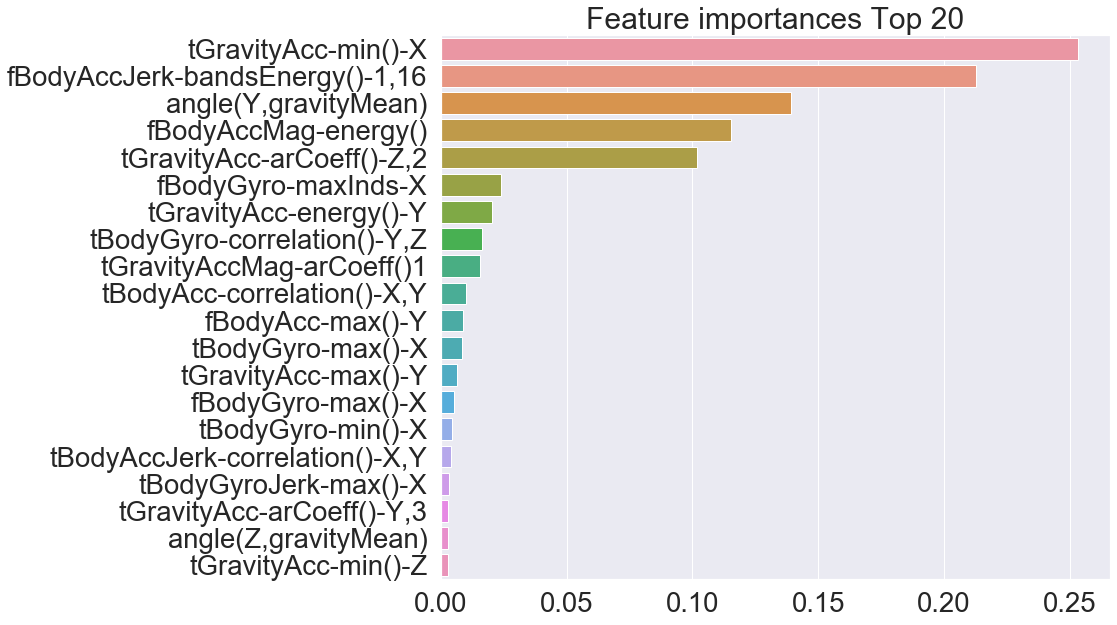

In [47]:
ftr_importances_values = best_df_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(12,10))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

Top5의 피쳐들이 매우 중요하게 규칙생성에 영향을 미치고 있는 것을 알 수 있다.